### Regression

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from Regression import regression, preprocessing
import matplotlib.pyplot as plt

batch_size = 32
epochs = 30
lr = 0.001

images_npy = '../Datasets/images.npy'
labels_npy = '../Datasets/labels.npy'
images = np.load(images_npy)
labels = np.load(labels_npy)

x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=0.8)
x_train, x_test, input_shape = preprocessing(x_train, x_test)
y_train = y_train[:, 0] + y_train[:, 1] / 60  # single output labels
y_test = y_test[:, 0] + y_test[:, 1] / 60

history, his = regression(x_train, y_train, x_test, y_test, batch_size, epochs, lr, input_shape)

In [8]:
# Training plot
train_loss = his.history['loss']
train_mse = his.history['mae']
val_loss = his.history['val_loss']
val_mse = his.history['val_mae']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'orange', label='train_loss')
plt.plot(epochs, train_mse, label='train_mse')
plt.plot(epochs, val_loss, label='val_loss')
plt.plot(epochs, val_mse, label='val_mse')
plt.legend()
plt.show()

Epoch 1/30
450/450 [==============================] - 10s 21ms/step - loss: 25.0162 - mae: 4.4271 - val_loss: 21.7130 - val_mae: 5.6070
Epoch 2/30
450/450 [==============================] - 9s 20ms/step - loss: 18.1236 - mae: 3.7374 - val_loss: 18.3904 - val_mae: 4.2400
Epoch 3/30
450/450 [==============================] - 9s 20ms/step - loss: 13.3023 - mae: 3.3682 - val_loss: 13.3647 - val_mae: 3.7397
Epoch 4/30
450/450 [==============================] - 9s 20ms/step - loss: 10.8037 - mae: 3.1199 - val_loss: 11.3793 - val_mae: 3.4392
Epoch 5/30
450/450 [==============================] - 9s 20ms/step - loss: 9.9577 - mae: 2.9913 - val_loss: 9.2223 - val_mae: 2.9310
Epoch 6/30
450/450 [==============================] - 9s 20ms/step - loss: 8.7372 - mae: 2.8098 - val_loss: 9.7727 - val_mae: 2.9784
Epoch 7/30
450/450 [==============================] - 9s 20ms/step - loss: 8.6595 - mae: 2.8910 - val_loss: 7.8245 - val_mae: 2.4976
Epoch 8/30
450/450 [==============================] - 9s 20m

In [ ]:
pred = history.predict(x_test)
print('min predict:', np.min(pred), 'max predict:', np.max(pred))
print("y_predict", '   ', 'y_test')
for i in range(100):
    print(pred[i], ' ', y_test[i])

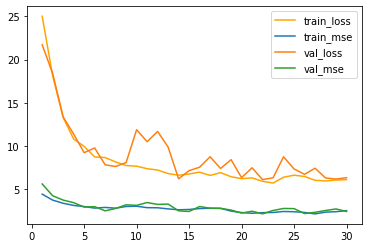

In [9]:
train_loss = his.history['loss']
train_mse = his.history['mae']
val_loss = his.history['val_loss']
val_mse = his.history['val_mae']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'orange', label='train_loss')
plt.plot(epochs, train_mse, label='train_mse')
plt.plot(epochs, val_loss, label='val_loss')
plt.plot(epochs, val_mse, label='val_mse')
plt.legend()
plt.show()

### Classfication

In [6]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from Classfication import classfication, preprocessing

classes_num = 12 * 2
batch_size = 128
epochs = 100
lr = 0.001

images_npy = '../Datasets/images.npy'
labels_npy = '../Datasets/labels.npy'

images = np.load(images_npy)
labels = np.load(labels_npy)
x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=0.8)

x_train, x_test, input_shape = preprocessing(x_train, x_test)
y_train = y_train[:, 0] * 2 + (y_train[:, 1] * 2 / 60).astype('int32')
y_test = y_test[:, 0] * 2 + (y_test[:, 1] * 2 / 60).astype('int32')

y_train_trans2class = to_categorical(y_train, classes_num)
y_test_trans2class = to_categorical(y_test, classes_num)

history, his = classfication(x_train, y_train_trans2class, x_test, y_test_trans2class, batch_size, epochs, lr, classes_num, input_shape)

Epoch 1/100
112/113 [============================>.] - ETA: 0s - loss: 9.5689 - categorical_accuracy: 0.0455

In [ ]:
acc = his.history['loss']
loss = his.history['categorical_accuracy']
accVal = his.history['val_loss']
lossVal = his.history['val_categorical_accuracy']
epochs = range(1, len(acc) + 1)
plt.title('Accuracy and Loss')
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, accVal, 'orange', label='Validation acc')
plt.plot(epochs, lossVal, 'red', label='Validation loss')
plt.legend()
plt.show()

In [ ]:
pred = history.predict(x_test)
print('min predict:', np.min(pred), 'max predict:', np.max(pred))
print("y_predict", '   ', 'y_test')
for i in range(100):
    print(pred[i], ' ', y_test[i])

### Multi head


In [33]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from MultiheadModel import multi_classfication, preprocessing

batch_size = 128
epochs = 100
lr = 0.001
classes_num = 12

images_npy = '../Datasets/images.npy'
labels_npy = '../Datasets/labels.npy'

images = np.load(images_npy)
labels = np.load(labels_npy)
x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=0.8)
x_train, x_test, input_shape = preprocessing(x_train, x_test)

hours_train = y_train[:,0]
minutes_train = y_train[:,1]
hours_test = y_test[:,0]
minutes_test = y_test[:,1]

y_train_hours = to_categorical(hours_train, classes_num)
y_train_mintues = minutes_train / 60
y_test_hours = to_categorical(hours_test, classes_num)
y_test_mintues = minutes_test / 60

y_train = [y_train_hours, y_train_mintues]
y_test = [y_test_hours, y_test_mintues]

history, his = classfication(x_train, y_train, x_test, y_test, batch_size, epochs, lr, classes_num, input_shape)

Epoch 1/60
 47/113 [===========>..................] - ETA: 3s - loss: 14.5153 - hours_loss: 3.7294 - minutes_loss: 1.8947 - hours_categorical_accuracy: 0.0909 - hours_mse: 0.0885 - minutes_categorical_accuracy: 1.0000 - minutes_mse: 38.1572

KeyboardInterrupt: 

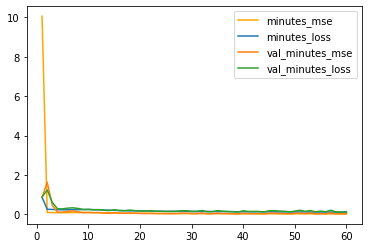

In [31]:
minutes_mse = his.history['minutes_mse']
minutes_loss = his.history['minutes_loss']
Vminutes_mse = his.history['val_minutes_mse']
Vminutes_loss = his.history['val_minutes_loss']
epochs = range(1, len(minutes_mse) + 1)
plt.plot(epochs, minutes_mse, 'orange', label='minutes_mse')
plt.plot(epochs, minutes_loss, label='minutes_loss')
plt.plot(epochs, Vminutes_mse, label='val_minutes_mse')
plt.plot(epochs, Vminutes_loss, label='val_minutes_loss')
plt.legend()
plt.show()

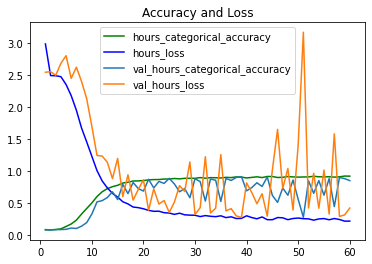

In [32]:
hours_acc = his.history['hours_categorical_accuracy']
hours_loss = his.history['hours_loss']

Vhours_acc = his.history['val_hours_categorical_accuracy']
Vhours_loss = his.history['val_hours_loss']

epochs = range(1, len(hours_acc) + 1)
plt.title('Accuracy and Loss')
plt.plot(epochs, hours_acc, 'green', label='hours_categorical_accuracy')
plt.plot(epochs, hours_loss, 'blue', label='hours_loss')

plt.plot(epochs, Vhours_acc, label='val_hours_categorical_accuracy')
plt.plot(epochs, Vhours_loss, label='val_hours_loss')

plt.legend()
plt.show()

In [ ]:
pred = history.predict(x_test)
print('min predict:', np.min(pred), 'max predict:', np.max(pred))
print("y_predict", '   ', 'y_test')
for i in range(100):
    print(pred[i], ' ', y_test[i])

### Label trans regression

In [43]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from LabelTrans_Regression import label_trans_regression, preprocessing, label_transform

batch_size = 128
epochs = 100
lr = 0.001

images_npy = '../Datasets/images.npy'
labels_npy = '../Datasets/labels.npy'

images = np.load(images_npy)
labels = np.load(labels_npy)

labels_trans = label_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels_trans, train_size=0.8)

x_train, x_test, input_shape = preprocessing(x_train, x_test)

history, his = label_trans_regression(x_train, y_train, x_test, y_test, batch_size, epochs, input_shape)

Epoch 1/30
113/113 [==============================] - 8s 63ms/step - loss: 31.3398 - mse: 10.8145 - accuracy: 0.2483 - val_loss: 23.7560 - val_mse: 0.7043 - val_accuracy: 0.2403
Epoch 2/30
113/113 [==============================] - 7s 60ms/step - loss: 18.5809 - mse: 0.7376 - accuracy: 0.3007 - val_loss: 20.3248 - val_mse: 0.8136 - val_accuracy: 0.2417
Epoch 3/30
113/113 [==============================] - 6s 57ms/step - loss: 15.4725 - mse: 0.6088 - accuracy: 0.3440 - val_loss: 18.2405 - val_mse: 0.6406 - val_accuracy: 0.2403
Epoch 4/30
113/113 [==============================] - 6s 54ms/step - loss: 13.4284 - mse: 0.4949 - accuracy: 0.3900 - val_loss: 16.1093 - val_mse: 0.5687 - val_accuracy: 0.3067
Epoch 5/30
113/113 [==============================] - 6s 54ms/step - loss: 11.6716 - mse: 0.4179 - accuracy: 0.4401 - val_loss: 14.6664 - val_mse: 0.4919 - val_accuracy: 0.3294
Epoch 6/30
113/113 [==============================] - 7s 58ms/step - loss: 10.5484 - mse: 0.3929 - accuracy: 0.465

In [ ]:
train_loss = his.history['loss']
train_mse = his.history['mse']
val_loss = his.history['val_loss']
val_mse = his.history['val_mse']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'orange', label='train_loss')
plt.plot(epochs, train_mse, label='train_mse')
plt.plot(epochs, val_loss, label='val_loss')
plt.plot(epochs, val_mse, label='val_mse')
plt.legend()
plt.show()

### re-Label trans

In [44]:
def label_transform_map(h_list, m_list):
    hours_array = np.zeros(shape=(len(h_list), 2))
    minutes_array = np.zeros(shape=(len(m_list), 2))
    for i in range(len(h_list)):
        hour = h_list[i]
        hours_array[i] = (np.sin(hour*(1/6)*np.pi),np.cos(hour*(1/6)*np.pi))

    for i in range(len(m_list)):
        minute = m_list[i]
        minutes_array[i] = (np.sin(minute * (1/3) * np.pi), np.cos(minute * (1/3)*np.pi))

    return hours_array, minutes_array

In [107]:
def distance(v1, v2):   
    dis_array = np.zeros(shape=(len(v2)))
    for i in range(len(v2)):
        dis_array[i] = float(np.sqrt(sum((v1 - v2[i])**2)))
    return dis_array

In [108]:
hours_list = np.arange(0, 12).astype('float32')
minutes_list = np.arange(0, 60).astype('float32')

h_map, m_map = label_transform_map(hours_list, minutes_list)

In [123]:
pred = history.predict(x_test)
hours = pred[:, 0:2]
minutes = pred[:, 2:]

def real_clock(hours, minutes):
    length = len(hours)
    result_list = np.zeros(shape=(length, 2))
    for i in range(length):
        hours_dis = distance(hours[i], h_map)
        minutes_dis = distance(minutes[i], m_map)

        h_min = np.argsort(hours_dis)[0:2]
        m_min = np.argsort(minutes_dis)[0]
        if (h_min[0] != 0) | (h_min[1] != 11):
            result_list[i] = (h_min[0], m_min)
        else:
            result_list[i] = (h_min[1], m_min)
    return result_list

113/113 [==============================] - 1s 7ms/step


In [128]:
result_list = real_clock(hours, minutes)
true_result = real_clock(y_test[:, 0:2], y_test[:, 2:])

In [129]:
for i in range(20):
    print(result_list[i], ' ', true_result[i])


[7. 0.]   [ 8. 35.]
[11.  0.]   [11. 39.]
[ 8. 15.]   [ 8. 18.]
[ 2. 33.]   [ 2. 38.]
[ 4. 25.]   [ 4. 10.]
[ 7. 29.]   [ 7. 46.]
[ 6. 25.]   [6. 4.]
[10. 28.]   [10. 13.]
[2. 0.]   [2. 3.]
[4. 0.]   [ 4. 47.]
[ 6. 36.]   [ 5. 13.]
[ 2. 47.]   [2. 3.]
[11. 43.]   [11.  8.]
[ 1. 25.]   [1. 7.]
[ 3. 25.]   [ 2. 29.]
[10. 25.]   [10. 54.]
[2. 0.]   [ 3. 20.]
[7. 1.]   [ 7. 24.]
[ 1. 29.]   [ 1. 17.]
[5. 0.]   [5. 4.]


In [18]:
for i in range(100):
    print(pred[i]*100, ' ', y_test[i]*100)

[ 42.235897 -42.425423  14.615626  15.788486]   [-9.65925826e+01 -2.58819045e+01 -1.22464680e-13  1.00000000e+02]
[ 15.461312   79.89877    -1.8230126 -11.053999 ]   [-86.16291604  50.7538363   86.60254038  50.        ]
[-22.207714  -74.30162   -20.334606    1.6888306]   [ 2.84015345e+01 -9.58819735e+01  1.10218212e-13 -1.00000000e+02]
[-69.33693   -33.53046     1.3371542   8.051591 ]   [-71.32504492  70.09092643 -86.60254038  50.        ]
[-64.98792    -3.462985   -0.1602903   3.7245915]   [ -8.71557427  99.61946981  86.60254038 -50.        ]
[-71.75081   38.01566   13.081477   2.821882]   [-88.29475929 -46.94715628 -86.60254038 -50.        ]
[88.13718  11.378106 20.30787   8.928518]   [ 75.47095802  65.6059029   86.60254038 -50.        ]
[64.513336 68.91401  19.695581 -1.656945]   [ 99.98476952  -1.74524064  86.60254038 -50.        ]
[ -0.77232313 -91.949356    -6.6257877  -12.351148  ]   [ 17.36481777 -98.4807753  -86.60254038 -50.        ]
[-11.81437   -66.79825     1.9492819  -6.9

---

classfication backpack


In [ ]:
# from keras.utils.np_utils import to_categorical
# from keras.models import Model, Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, BatchNormalization
# from keras import backend
# from sklearn.model_selection import train_test_split
# import numpy as np


# def preprocessing(train_data, test_data):
#     img_rows, img_cols = train_data.shape[1], train_data.shape[2]
#     if backend.image_data_format() == 'channels_first':
#         train_data = train_data.reshape(train_data.shape[0], 1, img_rows, img_cols)
#         test_data = test_data.reshape(test_data.shape[0], 1, img_rows, img_cols)
#         input_shape = (1, img_rows, img_cols)
#     else:
#         train_data = train_data.reshape(train_data.shape[0], img_rows, img_cols, 1)
#         test_data = test_data.reshape(test_data.shape[0], img_rows, img_cols, 1)
#         input_shape = (img_rows, img_cols, 1)  

#     train_data = train_data.astype('float32')
#     test_data = test_data.astype('float32')
#     train_data /= 255
#     test_data /= 255

#     return train_data, test_data, input_shape


# def classfication1(x_train, y_train, x_test, y_test, batch_size, epochs):

#     model = Sequential()
#     model.add(Input(shape=input_shape))
#     model.add(Conv2D(filters=32,
#                      kernel_size=(3, 3),
#                      activation='relu',
#                      kernel_regularizer='l2'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.25))
#     model.add(Conv2D(filters=64,
#                      kernel_size=(3, 3),
#                      activation='relu',
#                      kernel_regularizer='l2'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.25))
#     model.add(Conv2D(filters=128,
#                      kernel_size=(3, 3),
#                      activation='relu',
#                      kernel_regularizer='l2'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.25))

#     model.add(Flatten())
#     model.add(Dense(units=128,
#                     activation='relu',
#                     kernel_regularizer='l2'))
#     model.add(Dense(units=256,
#                     activation='relu',
#                     kernel_regularizer='l2'))
#     model.add(Dense(units=720,
#                     activation = "softmax"))

#     model.compile(loss='categorical_crossentropy',
#                   optimizer='adam',
#                   metrics=['accuracy'])

#     his = model.fit(x_train, y_train,
#               batch_size=batch_size,
#               epochs=epochs,
#               verbose=1,
#               validation_data=(x_test, y_test))
#     score = model.evaluate(x_test, y_test, verbose=0)
#     print('Test loss:', score[0])
#     print('Test mse:', score[1])
#     return model, his